In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as SS

scale = SS()

columnsToRetrieve = ['price', 'area', 'bedrooms', 'bathrooms', 'parking']

df = pd.read_csv("./Housing.csv", usecols=columnsToRetrieve)

print(df.info())

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   parking    545 non-null    int64
dtypes: int64(5)
memory usage: 21.4 KB
None
      price  area  bedrooms  bathrooms  parking
0  13300000  7420         4          2        2
1  12250000  8960         4          4        3
2  12250000  9960         3          2        2
3  12215000  7500         4          2        3
4  11410000  7420         4          1        2


slope:		 461.97489427278316
intercept:	 2387308.4823964313
r_score:	 0.2872931546811463
std_error:	 31.225635503291045


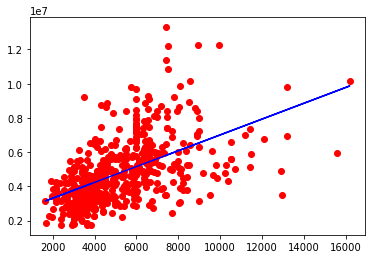

In [11]:
X = df['area']
Y = df['price']

slope, intercept, r_score, p_value, std_error = stats.linregress(X, Y)

r_value = r_score ** 2
area_r = r_value

print("slope:\t\t", slope)
print("intercept:\t", intercept)
print("r_score:\t", r_value)
print("std_error:\t", std_error)

def predict(x):
    return intercept + (x * slope)

areaFitLine = predict(X)

plt.scatter(X,Y, c='r')
plt.plot(X,areaFitLine, c='b')
plt.show()

slope:		 928788.1189320404
intercept:	 2012744.6601941697
r_score:	 0.13431787092793718
std_error:	 101188.01185230937


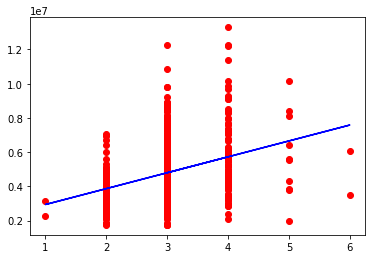

bedrooms
1    2.712500e+06
2    3.632022e+06
3    4.954598e+06
4    5.729758e+06
5    5.819800e+06
6    4.791500e+06
Name: price, dtype: float64


In [12]:
X = df['bedrooms']
Y = df['price']

slope, intercept, r_score, p_value, std_error = stats.linregress(X, Y)

r_value = r_score ** 2

bedrooms_r = r_value

print("slope:\t\t", slope)
print("intercept:\t", intercept)
print("r_score:\t", r_value)
print("std_error:\t", std_error)

areaFitLine = predict(X)

plt.scatter(X,Y, c='r')
plt.plot(X,areaFitLine, c='b')
plt.show()

print(Y.groupby(X).mean())

slope:		 1926558.8901060724
intercept:	 2288714.9688727395
r_score:	 0.2678531783916027
std_error:	 136688.8414935776


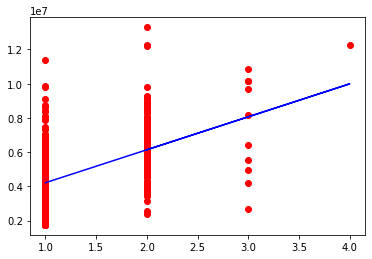

bathrooms
1    4.206913e+06
2    6.209206e+06
3    7.282100e+06
4    1.225000e+07
Name: price, dtype: float64


In [13]:
X = df['bathrooms']
Y = df['price']

slope, intercept, r_score, p_value, std_error = stats.linregress(X, Y)

r_value = r_score ** 2

bathrooms_r = r_value

print("slope:\t\t", slope)
print("intercept:\t", intercept)
print("r_score:\t", r_value)
print("std_error:\t", std_error)

areaFitLine = predict(X)

plt.scatter(X,Y, c='r')
plt.plot(X,areaFitLine, c='b')
plt.show()

print(Y.groupby(X).mean())

slope:		 834490.4822660213
intercept:	 4187945.023309071
r_score:	 0.14775847711148593
std_error:	 86005.57719030003


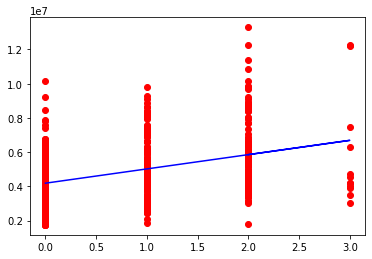

parking
0    4.136017e+06
1    5.190389e+06
2    5.896328e+06
3    5.867167e+06
Name: price, dtype: float64


In [14]:
X = df['parking']
Y = df['price']

slope, intercept, r_score, p_value, std_error = stats.linregress(X, Y)

r_value = r_score ** 2

parking_r = r_value

print("slope:\t\t", slope)
print("intercept:\t", intercept)
print("r_score:\t", r_value)
print("std_error:\t", std_error)

fitLine = predict(X)

plt.scatter(X,Y, c='r')
plt.plot(X, fitLine, c='b')
plt.show()

print(Y.groupby(X).mean().astype('str'))

In [15]:
X = df[['area', 'bedrooms', 'bathrooms', 'parking']]
Y = df['price']
X[['area', 'bedrooms', 'bathrooms', 'parking']] = scale.fit_transform(X[['area', 'bedrooms', 'bathrooms', 'parking']].values)
X = sm.add_constant(X)

print(X)

estimator = sm.OLS(Y, X).fit()

print(estimator.summary())

     const      area  bedrooms  bathrooms   parking
0      1.0  1.046726  1.403419   1.421812  1.517692
1      1.0  1.757010  1.403419   5.405809  2.679409
2      1.0  2.218232  0.047278   1.421812  1.517692
3      1.0  1.083624  1.403419   1.421812  2.679409
4      1.0  1.046726  1.403419  -0.570187  1.517692
..     ...       ...       ...        ...       ...
540    1.0 -0.991879 -1.308863  -0.570187  1.517692
541    1.0 -1.268613  0.047278  -0.570187 -0.805741
542    1.0 -0.705921 -1.308863  -0.570187 -0.805741
543    1.0 -1.033389  0.047278  -0.570187 -0.805741
544    1.0 -0.599839  0.047278  -0.570187 -0.805741

[545 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     140.6
Date:                Sun, 03 Oct 202

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
